In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regression: Simple Linear Regression model

## Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Loading the Dataset

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adverk-Artificial_Intelligence/Experience_and_Salary/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Equation of Straight line

### y=mx+c
where,<br>y=dependent variable<br>x=independent variable<br>m=slope of the line<br>c=intercept or (co-efficent)

In [4]:
fig=px.scatter(data,x='YearsExperience',y='Salary')
fig.show()

### Slope linear regression formula
<br><img src="https://media.licdn.com/dms/image/C5112AQEE9_VmCIlnpQ/article-inline_image-shrink_400_744/0/1531743844255?e=1694649600&v=beta&t=bQ7JK0zsDNDgMFRVS1Lzekc3rJRwd3BpOxn06a9DXV4">

In [5]:
data.duplicated().sum() # no duplicates

0

In [6]:
# data.drop_duplicates()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

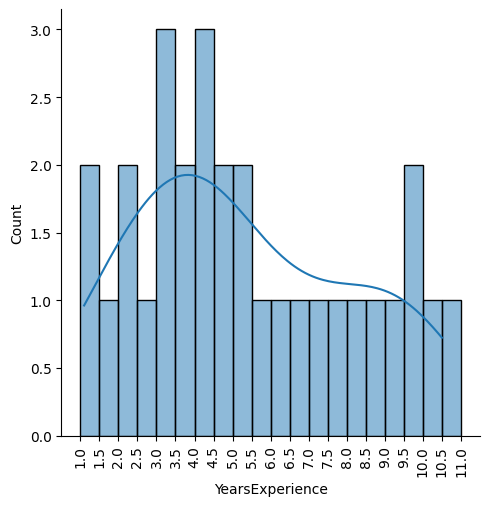

In [9]:
intervals=np.arange(1,11.1,0.5)
sns.displot(data['YearsExperience'], kde=True, bins=intervals)
plt.xticks(intervals, rotation = 90)
plt.show()

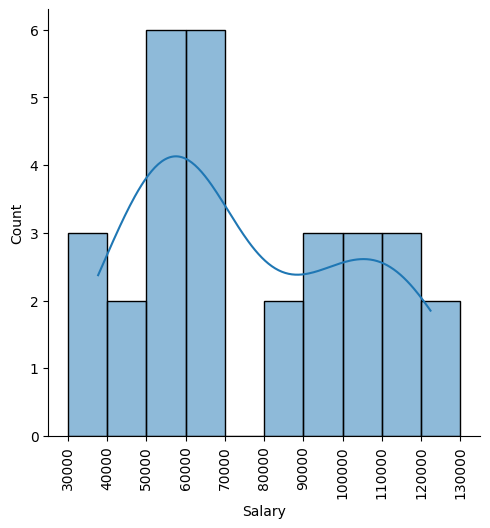

In [10]:
price_range=np.arange(30000,131000,10000)
sns.displot(data['Salary'], kde=True, bins=price_range)
plt.xticks(price_range, rotation = 90)
plt.show()

### Dividing the data into input and output
<br>sklearn requires that input should be in 2D and output in 1D<br>
we can convert the sequence data into dataframe by using [[ ]] brackets

WE CAN ACHIEVE THIS IN TWO WAYS

In [11]:
X=data[['YearsExperience']].values
y=data['Salary'].values

or

In [12]:
X=data.iloc[:,[0]].values
y=data.iloc[:,1].values

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [14]:
model.fit(X,y,)

LinearRegression()

In [15]:
model.predict([[7.5]])

array([96666.91760958])

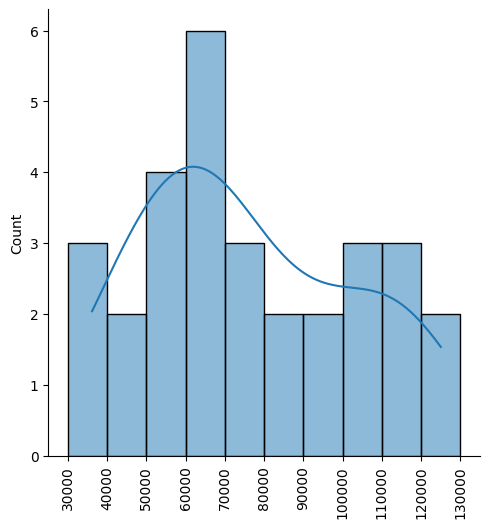

In [16]:
y_pred=model.predict(X)
price_range=np.arange(30000,131000,10000)
sns.displot(y_pred,kde=True,bins=price_range)
plt.xticks(price_range, rotation = 90)
plt.show()

## Evaluation Metrics
<br>MAE : Mean Absolute Error  (average of | y - y_pred | )
<br>MSE : Mean Squared Error   (average of | y - y_pred |^2 )
<br>RMSE : Root Mean Squared Error (root square of MSE )
<br>R2 score : co-efficent of determination or R-Squared

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

4644.2012894435375

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

31270951.722280964

In [19]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9569566641435086

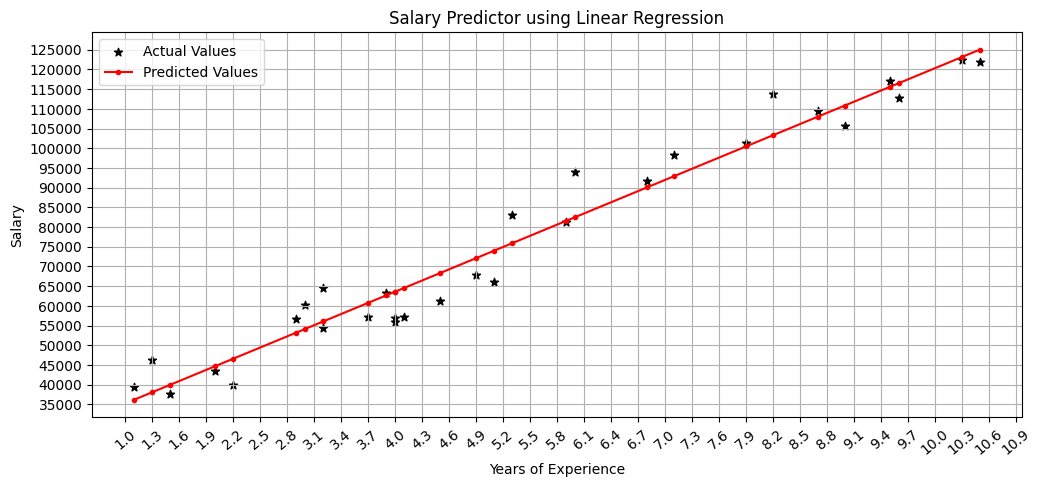

In [20]:
plt.figure(figsize=(12,5))
plt.scatter(X,y, color='k',marker="*",label="Actual Values")
plt.plot(X,y_pred,color='red', label="Predicted Values", marker=".")
plt.xticks(np.arange(1,11,0.3),rotation=40)
plt.yticks(np.arange(35000,129000,5000))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Predictor using Linear Regression')
plt.legend()
plt.grid()
plt.show()

ML OPS

In [21]:
import joblib
joblib.dump(model,'lr_model')

['lr_model']

In [29]:
%%writefile app.py
import streamlit as st
import joblib
st.header("Salary Predictor using Linear regression")
st.caption("This ML model was designed with a sample data obtained from kaggle. Linear Regression was the algorithm used here.")

model=joblib.load('lr_model')

years=st.slider("Enter the number of years of experience",min_value=0.0,max_value=13.0,value=4.5,step=0.1)

if st.button("PREDICT"):
  op=model.predict([[years]])
  st.subheader("The estimated salary for a person having "+str(years)+" years of experience is ₨ "+str(round(op[0],2)))


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] \ fetchMetadata: sill resolveWithNewModule is-fullwidth-co


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.238.232:8501

npx: installed 22 in 5.127s
your url is: https://violet-bobcats-teach.loca.lt
